*Este notebook contêm códigos extraidos do livro: [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) escrito por Jake VanderPlas; o conteúdo completo do livro está disponível [no GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


# Regressão Linear

Assim como Naive Bayes (discutido anteriormente em [Naive Bayes Classification](Aula_6_1_Naive_Bayes.ipynb)) é um bom ponto de partida para tarefas de classificação, os modelos de regressão linear são um bom ponto de partida para tarefas de regressão.
Esses modelos são populares porque podem ser ajustados muito rapidamente e são muito interpretáveis.
Você provavelmente está familiarizado com a forma mais simples de um modelo de regressão linear (ou seja, ajustar uma linha reta aos dados), mas esses modelos podem ser estendidos para modelar comportamentos de dados mais complicados.


In [1]:

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

Começaremos com a regressão linear mais familiar, um ajuste em linha reta aos dados. Um ajuste em linha reta é um modelo da forma
$$
y = ax + b
$$
onde $a$ é comumente chamado de  *coeficiente angular*, e $b$ é comumente chamado de *coeficiente linear*.

Considere os seguintes dados, que estão espalhados em uma linha com $a$ = 2 e $b$ = -5:

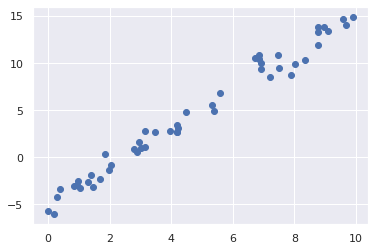

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Podemos usar o regressor ``LinearRegression`` do Scikit-Learns para ajustar esses dados e construir a linha de melhor ajuste

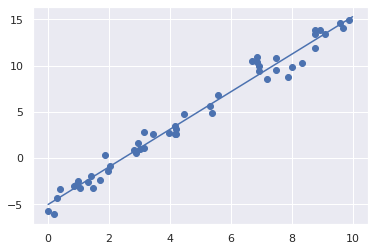

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

A inclinação e o coeficiente linear dos dados estão contidas nos parâmetros de ajuste do modelo, que no Scikit-Learn são sempre marcados por um sublinhado à direita.
Aqui os parâmetros relevantes são ``coef_`` e ``intercept_``:

In [4]:
print("Model coeficiente angular:    ", model.coef_[0])
print("Model coeficiente linear:", model.intercept_)

Model coeficiente angular:     2.027208810360695
Model coeficiente linear: -4.998577085553202


We see that the results are very close to the inputs, as we might hope.

O regressor ``LinearRegression`` pode fazer muito mais - além de ajustes simples em linha reta, ele também pode lidar com modelos lineares multidimensionais da forma:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
Onde existem vários valores $x$
Geometricamente, isso é semelhante a ajustar um plano a pontos em três dimensões, ou ajustar um hiperplano a pontos em dimensões superiores. 

A natureza multidimensional de tais regressões as torna mais difíceis de visualizar, mas podemos ver um desses ajustes em ação construindo alguns dados de exemplo, usando o operador de multiplicação de matriz NumPy:

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])


In [6]:
train_set = zip(X,y)

In [7]:
for x,target in train_set:
    print(f"Valores de x: {x} e valor esperado: {target}")

Valores de x: [4.17022005e+00 7.20324493e+00 1.14374817e-03] e valor esperado: -7.650016050131102
Valores de x: [3.02332573 1.46755891 0.92338595] e valor esperado: 3.023256720823314
Valores de x: [1.86260211 3.45560727 3.96767474] e valor esperado: 0.3503633721108077
Valores de x: [5.38816734 4.19194514 6.852195  ] e valor esperado: 7.050555725952054
Valores de x: [2.0445225  8.78117436 0.27387593] e valor esperado: -13.721689049866884
Valores de x: [6.7046751  4.17304802 5.58689828] e valor esperado: 7.79781488979101
Valores de x: [1.40386939 1.98101489 8.00744569] e valor esperado: 6.651219983986296
Valores de x: [9.68261576 3.13424178 6.92322616] e valor esperado: 15.678666229299246
Valores de x: [8.76389152 8.94606664 0.85044211] e valor esperado: -3.395853871938593
Valores de x: [0.39054783 1.6983042  8.78142503] e valor esperado: 6.470638391495989
Valores de x: [0.98346834 4.21107625 9.5788953 ] e valor esperado: 3.131945308899727
Valores de x: [5.33165285 6.91877114 3.15515631]

In [8]:
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


In [8]:
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]
